<a href="https://colab.research.google.com/github/haripurwadi/python-dasar/blob/main/KMean_foto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [ ]:
#mengambil gammbar dari kameraa
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo3.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo3.jpg


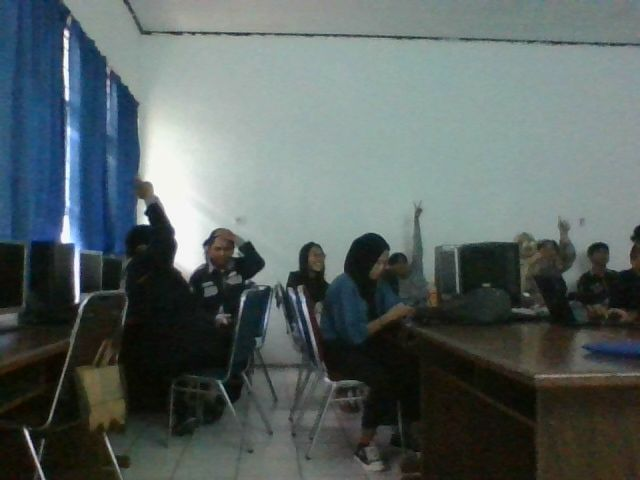

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img = cv2.imread("photo3.jpg")

In [ ]:


img.shape



(480, 640, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

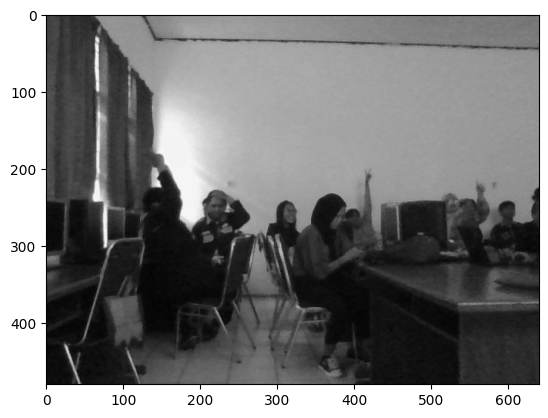

In [ ]:
plt.imshow(gray, cmap="gray")

In [ ]:


bw = (gray > 127).astype(int)



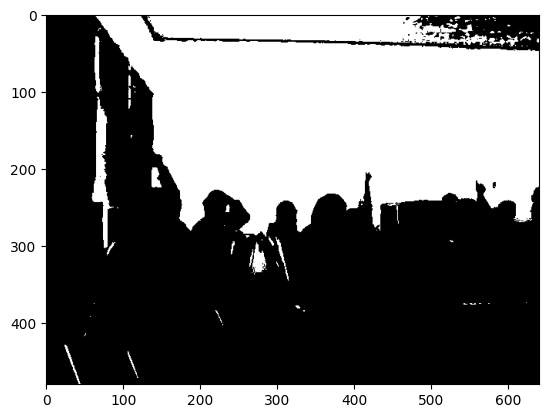

In [ ]:
plt.imshow(bw, cmap="gray")

In [ ]:


color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



In [ ]:


color_img.shape



(480, 640, 3)

In [ ]:
X = color_img.reshape(-1, 3)

In [ ]:
model = KMeans(10)

In [ ]:


model.fit(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:


X.shape



(307200, 3)

In [ ]:


pallet = model.cluster_centers_.astype(int)



In [ ]:
pallet_img = pallet.reshape(2, 5, 3)

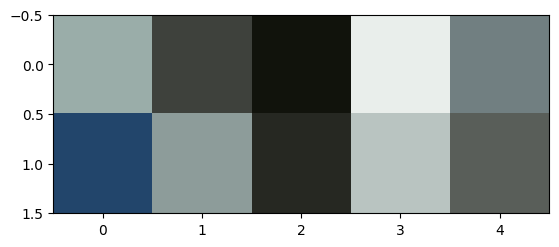

In [ ]:
plt.imshow(pallet_img)

In [ ]:
pallet

array([[154, 173, 169],
       [ 62,  65,  60],
       [ 17,  19,  12],
       [233, 238, 235],
       [113, 127, 129],
       [ 34,  69, 107],
       [141, 156, 154],
       [ 38,  40,  34],
       [185, 196, 193],
       [ 89,  94,  89]])

In [ ]:
result = np.zeros(X.shape, dtype=int)

In [ ]:


for index in range(len(result)):
    result[index] = pallet[model.labels_[index]]



In [ ]:


result = result.reshape(color_img.shape)



True

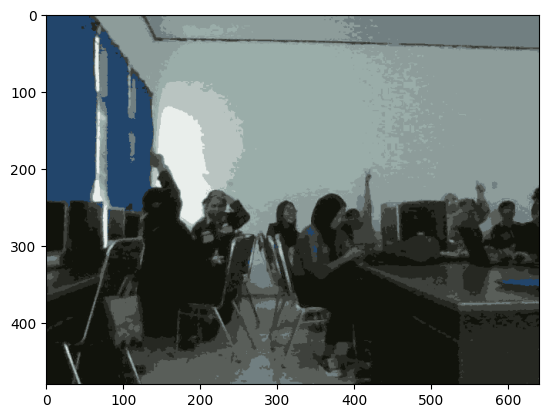

In [ ]:
plt.imshow(result)
cv2.imwrite('photo4.jpg', result)

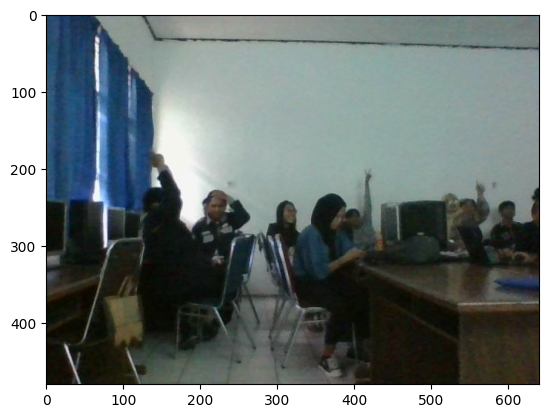

In [ ]:
plt.imshow(color_img)


In [ ]:
X.shape

(307200, 3)

In [ ]:
!pip install scikit-image

In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.measure import compare_ssim
from skimage.measure import compare_psnr
import skimage.io as skio

from skimage import img_as_float, data
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, denoise_nl_means, estimate_sigma

ImportError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  # Remove the CWD from sys.path while we load stuff.


ssim:  0.8562250602591418  psnr:  20.798313574241412


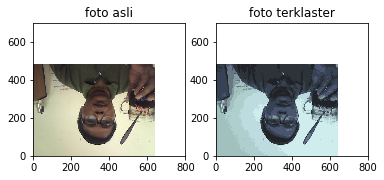

In [ ]:
#tampilkan gambar asli dan recolored berdasarkan psnr dan ssim
img_noisy_BGR = cv2.imread('photo3.jpg') #read in BGR
img_clean_BGR = cv2.imread('photo4.jpg')
img_noisy_RGB = cv2.cvtColor(img_noisy_BGR, cv2.COLOR_BGR2RGB) #convert to RGB
img_clean_RGB = cv2.cvtColor(img_clean_BGR, cv2.COLOR_BGR2RGB) #convert to RGB

#ssimval, ssimvis = compare_ssim(img_clean_BGR, img_noisy_BGR, full=True, multichannel=True)
#psnrval = compare_psnr(img_clean_BGR, img_noisy_BGR)

ssimval, ssimvis = compare_ssim(img_clean_RGB, img_noisy_RGB, full=True, multichannel=True)
psnrval = compare_psnr(img_clean_RGB, img_noisy_RGB)

print('ssim: ', ssimval, ' psnr: ', psnrval)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_noisy_RGB)
ax1.set_title('foto asli')
ax1.set_xlim(0,800)
ax1.set_ylim(0,700)
ax2.imshow(img_clean_RGB)
ax2.set_title('foto terklaster')
ax2.set_xlim(0,800)
ax2.set_ylim(0,700)
plt.show()